**BEFORE ANYTHING, IMPORT THE NECESSARY LIBRARIES**

In [1]:
import numpy as np
import pandas as pd


## SUPERVISED LEARNING

As described in class, the datapoints used in supervised learning are associated with output labels which are used for training. The models trained are then used to predict on similar unseen data to produce similar labels.

Supervised learning is broadly divided into two parts:
- Regression: The output labels are continuous in nature.

*(Content shortened for brevity)*

### BINARY CLASSIFICATION

In [2]:
! gdown 1nkDc4tAv7yMASRSLkbRAttr8qSG5dmcP

Downloading...
From: https://drive.google.com/uc?id=1nkDc4tAv7yMASRSLkbRAttr8qSG5dmcP
To: /content/nba_logreg.csv
100% 129k/129k [00:00<00:00, 73.7MB/s]


**Import the csv file `NBA_logreg.csv` as a Pandas dataframe.**

In [3]:
df = pd.read_csv('nba_logreg.csv')

**Lets analyse the data a tiny bit!**

**What are the no. of rows and columns in the dataset?**

In [10]:
#ENTER YOUR CODE HERE
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

**What are the columns?**

In [5]:
df.columns

Index(['Name', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'TARGET_5Yrs'],
      dtype='object')

**What does the beginning of the dataset look like?**

In [6]:
#ENTER YOUR CODE HERE
df.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


Actually, the given dataset describes the player history of several NBA players. The column 'TARGET_5yrs' only contains the values 0 and 1, with 0 standing for players who played for less than 5 years, and 1 for players who played for more than or equal to 5 years. Thus, 0 and 1 stand for 2 classes- binary classification!

**Clean the dataset. Drop the NaN values!**



In [11]:
df.dropna(inplace=True)

**What is the shape of the dataframe now?**

In [12]:
df.shape

(1329, 21)

**For training, first create a dataframe that stores the columns to be used for training, and another dataframe that stores the labels.**

In [16]:
#ENTER YOUR CODE HERE
X = df.drop(columns=['Name', 'TARGET_5Yrs'])
y = df['TARGET_5Yrs']
print(X.shape)
print(y.shape)

(1329, 19)
(1329,)


It is considered best practice to divide the dataset into two parts- test and train(Search the internet for the reason- we'll ask in class :)).

**Import the sklearn module that allows us to split the dataset into train and test.**

In [17]:
#ENTER YOUR CODE HERE
from sklearn.model_selection import train_test_split

**Now divide the features and label dataframes into train and test splits.**

In [18]:
#ENTER YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1063, 19)
(266, 19)
(1063,)
(266,)


**Now load the sklearn module that allows the creation of a logistic regression model.**

In [20]:
#ENTER YOUR CODE HERE
from sklearn.linear_model import LogisticRegression

**Onto training! Train the a logistic regression model using the training features and labels dataframes.**

In [22]:
#ENTER YOUR CODE HERE
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Your model is trained! Time to check how good it is by using it on the testing dataframe.
Some metrics are used to check the reliability of a model.

**As an exercise, read about these and fill out the markdown below!**


- Accuracy: Proportion of correct predictions a model makes out of the total number of predictions.
- F1 score: Metric used to evaluate the accuracy of a model. It is calculated by taking harmonic mean of precision and recall, and is particularly useful for imbalanced data.
- Precision: Proportion of correct positive predictions out of all the positive predictions made by the model.
- Recall: Proportion of actual positive instances that the model correctly identified.

All of these can be calculated for our model using sklearn modules.

**Import them!**

In [25]:
#ENTER YOUR CODE HERE
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

**Now test on the testing dataframe and print all of these metrics.**

In [32]:
#ENTER YOUR CODE HERE
y_pred_logistic = model.predict(X_test)

print(accuracy_score(y_test, y_pred_logistic))
print(f1_score(y_test, y_pred_logistic))
print(precision_score(y_test, y_pred_logistic))
print(recall_score(y_test, y_pred_logistic))

0.7518796992481203
0.8135593220338984
0.8089887640449438
0.8181818181818182


**Your Logistic Regression model is well trained!**

Support Vector Machine is another model that can be used both for regression and classification. We'll be training a classification model on our current dataset.

**Import the sklearn module that is used to implement a classification SVM**

In [28]:
#ENTER YOUR CODE HERE
from sklearn.svm import SVC

**Just as we had before, load and fit a model on our training dataset.**

In [30]:
#ENTER YOUR CODE HERE
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

**Now test the model on the training dataset, and check the relevant metrics!**

In [33]:
#ENTER YOUR CODE HERE
y_pred_svc = svc_model.predict(X_test)

print(accuracy_score(y_test, y_pred_svc))
print(f1_score(y_test, y_pred_svc))
print(precision_score(y_test, y_pred_svc))
print(recall_score(y_test, y_pred_svc))

0.7443609022556391
0.8131868131868132
0.7872340425531915
0.8409090909090909


### MULTICLASS CLASSIFICATION

In [53]:
! gdown 1bhWHfp1QS7ZHbNbxP_zFtEUAf76WfntC

Downloading...
From: https://drive.google.com/uc?id=1bhWHfp1QS7ZHbNbxP_zFtEUAf76WfntC
To: /content/social_well_being.csv
100% 43.1k/43.1k [00:00<00:00, 69.5MB/s]


**Import the csv `social_well_being.csv` as a pandas dataframe.**

In [115]:
#ENTER YOUR CODE HERE
data = pd.read_csv('social_well_being.csv')

**Always analyse the data.**

In [46]:
#ENTER YOUR CODE HERE
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     924 non-null    int64 
 1   Age                         924 non-null    int64 
 2   Gender                      924 non-null    object
 3   Platform                    924 non-null    object
 4   Daily_Usage_Time (minutes)  924 non-null    int64 
 5   Posts_Per_Day               924 non-null    int64 
 6   Likes_Received_Per_Day      924 non-null    int64 
 7   Comments_Received_Per_Day   924 non-null    int64 
 8   Messages_Sent_Per_Day       924 non-null    int64 
 9   Dominant_Emotion            924 non-null    object
dtypes: int64(7), object(3)
memory usage: 72.3+ KB


In [47]:
data.columns

Index(['User_ID', 'Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)',
       'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion'],
      dtype='object')

In [48]:
data.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120,3,45,10,12,Happiness
1,2,30,Male,Twitter,90,5,20,25,30,Anger
2,3,22,Non-binary,Facebook,60,2,15,5,20,Neutral
3,4,28,Female,Instagram,200,8,100,30,50,Anxiety
4,5,33,Male,LinkedIn,45,1,5,2,10,Boredom


Since its multiclass-classification, the classes column 'Dominant_Emotion' has more than two classes.

**Can you find out what these classes are?**

In [49]:
#ENTER YOUR CODE HERE
print(data['Dominant_Emotion'].unique())

['Happiness' 'Anger' 'Neutral' 'Anxiety' 'Boredom' 'Sadness']


Actually this isn't the only categorical column in the dataset. There are other too.

**Print their values as well!**

In [50]:
#ENTER YOUR CODE HERE
print(data['Gender'].unique())
print(data['Platform'].unique())

['Female' 'Male' 'Non-binary']
['Instagram' 'Twitter' 'Facebook' 'LinkedIn' 'Whatsapp' 'Telegram'
 'Snapchat']


Many models, including KNN, will only work with numerical data. Hence the textual categories need to go. We will use something called "one-hot encoding" for transforming our features and "labelling" for our categories.

**Import the pandas module used for one-hot encoding**

**First One-Hot Encode the 'Gender' column and replace the 'Gender' column with this.**

In [116]:
#ENTER YOUR CODE HERE
gender_onehot = pd.get_dummies(data['Gender']).astype(int)
data = pd.concat([data, gender_onehot], axis=1)
data.drop('Gender', axis=1, inplace=True)
data

,User_ID,Age,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Female,Male,Non-binary
0,1,25,Instagram,120,3,45,10,12,Happiness,1,0,0
1,2,30,Twitter,90,5,20,25,30,Anger,0,1,0
2,3,22,Facebook,60,2,15,5,20,Neutral,0,0,1
3,4,28,Instagram,200,8,100,30,50,Anxiety,1,0,0
4,5,33,LinkedIn,45,1,5,2,10,Boredom,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
919,996,33,Twitter,85,4,35,18,18,Boredom,0,0,1
920,997,22,Facebook,70,1,14,6,10,Neutral,1,0,0
921,998,35,Whatsapp,110,3,50,25,25,Happiness,0,1,0
922,999,28,Telegram,60,2,18,8,18,Anger,0,0,1


**Repeat the drill for the column 'Platform'.**

In [117]:
#ENTER YOUR CODE HERE
platform_onehot = pd.get_dummies(data['Platform']).astype(int)
data = pd.concat([data, platform_onehot], axis=1)
data.drop('Platform', axis=1, inplace=True)
data

,User_ID,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Female,Male,Non-binary,Facebook,Instagram,LinkedIn,Snapchat,Telegram,Twitter,Whatsapp
0,1,25,120,3,45,10,12,Happiness,1,0,0,0,1,0,0,0,0,0
1,2,30,90,5,20,25,30,Anger,0,1,0,0,0,0,0,0,1,0
2,3,22,60,2,15,5,20,Neutral,0,0,1,1,0,0,0,0,0,0
3,4,28,200,8,100,30,50,Anxiety,1,0,0,0,1,0,0,0,0,0
4,5,33,45,1,5,2,10,Boredom,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,996,33,85,4,35,18,18,Boredom,0,0,1,0,0,0,0,0,1,0
920,997,22,70,1,14,6,10,Neutral,1,0,0,1,0,0,0,0,0,0
921,998,35,110,3,50,25,25,Happiness,0,1,0,0,0,0,0,0,0,1
922,999,28,60,2,18,8,18,Anger,0,0,1,0,0,0,0,1,0,0


Last categorical feature is our label column.

**Import the module used for label encoding.**

In [63]:
#ENTER YOUR CODE HERE
from sklearn.preprocessing import LabelEncoder

**Now label encode the column 'Dominant_Emotion'**

In [118]:
#ENTER YOUR CODE HERE
le = LabelEncoder()
data['Dominant_Emotion_Encoded'] = le.fit_transform(data['Dominant_Emotion'])
data.drop('Dominant_Emotion', axis=1, inplace=True)
data

,User_ID,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Female,Male,Non-binary,Facebook,Instagram,LinkedIn,Snapchat,Telegram,Twitter,Whatsapp,Dominant_Emotion_Encoded
0,1,25,120,3,45,10,12,1,0,0,0,1,0,0,0,0,0,3
1,2,30,90,5,20,25,30,0,1,0,0,0,0,0,0,1,0,0
2,3,22,60,2,15,5,20,0,0,1,1,0,0,0,0,0,0,4
3,4,28,200,8,100,30,50,1,0,0,0,1,0,0,0,0,0,1
4,5,33,45,1,5,2,10,0,1,0,0,0,1,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,996,33,85,4,35,18,18,0,0,1,0,0,0,0,0,1,0,2
920,997,22,70,1,14,6,10,1,0,0,1,0,0,0,0,0,0,4
921,998,35,110,3,50,25,25,0,1,0,0,0,0,0,0,0,1,3
922,999,28,60,2,18,8,18,0,0,1,0,0,0,0,1,0,0,0


Now we have only numerical data, phew! Lets start training!

**Create the freatures dataframe and the labels dataframe as we had done before, and split them into train and test parts. Do you need to import the libraries again?**

In [119]:
#ENTER YOUR CODE HERE
data.dropna(inplace=True)

X = data.drop(columns=['Dominant_Emotion_Encoded'])
y = data['Dominant_Emotion_Encoded']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(739, 17)
(185, 17)
(739,)
(185,)


**Import the module used for training a KNN model.**

In [71]:
#ENTER YOUR CODE HERE
from sklearn.neighbors import KNeighborsClassifier

In [120]:
#I am doing this as I was getting a very low accuracy with KNN, and GPT suggested scaling the data as KNN is sensitive wrt scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Train your model.**

In [121]:
#ENTER YOUR CODE HERE
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

**Create and print the Prediction Dataframe.**

In [122]:
#ENTER YOUR CODE HERE
Dominant_Emotion_Encoded_Predicted = knn.predict(X_test_scaled)
pred_df = pd.DataFrame(Dominant_Emotion_Encoded_Predicted, columns=['Dominant_Emotion_Encoded_Predicted'])
pred_df

,Dominant_Emotion_Encoded_Predicted
0,0
1,0
2,2
3,3
4,4
...,...
180,2
181,1
182,0
183,2


I'm guessing you notice the issue. These are not our original labels!

**Tranform these labels using the encoder you had created while encoding 'Dominant_Emotion'.**

In [123]:
#ENTER YOUR CODE HERE
Dominant_Emotion_Predicted = le.inverse_transform(Dominant_Emotion_Encoded_Predicted)
Dominant_Emotion_Predicted

array(['Anger', 'Anger', 'Boredom', 'Happiness', 'Neutral', 'Neutral',
       'Neutral', 'Anxiety', 'Neutral', 'Boredom', 'Anger', 'Neutral',
       'Boredom', 'Happiness', 'Anger', 'Anxiety', 'Anxiety', 'Boredom',
       'Happiness', 'Happiness', 'Anger', 'Boredom', 'Anxiety',
       'Happiness', 'Boredom', 'Neutral', 'Anger', 'Anxiety', 'Anger',
       'Neutral', 'Anxiety', 'Sadness', 'Anger', 'Happiness', 'Anger',
       'Neutral', 'Anger', 'Happiness', 'Sadness', 'Anxiety', 'Anger',
       'Anger', 'Sadness', 'Neutral', 'Happiness', 'Neutral', 'Neutral',
       'Anger', 'Happiness', 'Boredom', 'Sadness', 'Anxiety', 'Anxiety',
       'Sadness', 'Happiness', 'Anger', 'Anxiety', 'Neutral', 'Neutral',
       'Happiness', 'Anxiety', 'Happiness', 'Sadness', 'Anxiety',
       'Happiness', 'Happiness', 'Happiness', 'Anxiety', 'Neutral',
       'Happiness', 'Neutral', 'Boredom', 'Boredom', 'Anxiety', 'Neutral',
       'Happiness', 'Neutral', 'Happiness', 'Anger', 'Sadness', 'Sadness',
     

**Now print the relevant metrics! Don't forget to get original y_test first!**

In [124]:
#ENTER YOUR CODE HERE
y_test_original = le.inverse_transform(y_test)
print(accuracy_score(y_test_original, Dominant_Emotion_Predicted))

0.8972972972972973


**That's a good model!**

Since it's multi-class classification, traditional metrics like precision and recall won't work. We'll judge our model using a confusion matrix and classification report!

**Import the module for confusion matrix and classification report, and print them.**

In [125]:
#ENTER YOUR CODE HERE
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test_original, Dominant_Emotion_Predicted)
print(cm)
print(classification_report(y_test_original, Dominant_Emotion_Predicted))

[[27  1  0  0  0  1]
 [ 2 24  5  0  3  1]
 [ 0  0 17  0  1  0]
 [ 0  1  0 42  0  0]
 [ 1  1  0  0 33  0]
 [ 0  0  2  0  0 23]]
              precision    recall  f1-score   support

       Anger       0.90      0.93      0.92        29
     Anxiety       0.89      0.69      0.77        35
     Boredom       0.71      0.94      0.81        18
   Happiness       1.00      0.98      0.99        43
     Neutral       0.89      0.94      0.92        35
     Sadness       0.92      0.92      0.92        25

    accuracy                           0.90       185
   macro avg       0.88      0.90      0.89       185
weighted avg       0.90      0.90      0.90       185



We already have our training and test datasets ready, lets train some other models.

**Import Naive Bayes**

In [101]:
#ENTER YOUR CODE HERE
from sklearn.naive_bayes import GaussianNB

**Now instantiate and fit a model.**

In [126]:
#ENTER YOUR CODE HERE
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

GaussianNB()

**Predict on the test features, and dont forget to inverse transform!**

In [127]:
#ENTER YOUR CODE HERE
y_pred_nb = gnb.predict(X_test_scaled)

y_pred_nb_decoded = le.inverse_transform(y_pred_nb)
y_test_decoded = le.inverse_transform(y_test)

**Finally, print the accuracy, confusion matrix and classification report.**

In [128]:
#ENTER YOUR CODE HERE
print(accuracy_score(y_test_decoded, y_pred_nb_decoded))
print(confusion_matrix(y_test_decoded, y_pred_nb_decoded))
print(classification_report(y_test_decoded, y_pred_nb_decoded))

0.42702702702702705
[[23  0  2  4  0  0]
 [ 8  0 14 13  0  0]
 [ 4  0 14  0  0  0]
 [ 5  0  0 38  0  0]
 [12  0 17  5  0  1]
 [12  0  7  2  0  4]]
              precision    recall  f1-score   support

       Anger       0.36      0.79      0.49        29
     Anxiety       0.00      0.00      0.00        35
     Boredom       0.26      0.78      0.39        18
   Happiness       0.61      0.88      0.72        43
     Neutral       0.00      0.00      0.00        35
     Sadness       0.80      0.16      0.27        25

    accuracy                           0.43       185
   macro avg       0.34      0.44      0.31       185
weighted avg       0.33      0.43      0.32       185



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Now train a 'Decision Tree' and a 'Random Forest Generator' for the same classification problem.Feel free to play with the hyperparameters!

### Report the accuracy score for each!

In [140]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(
    criterion='entropy',max_depth=9, random_state=42
)

dtc.fit(X_train_scaled, y_train)
y_pred_dtc = dtc.predict(X_test_scaled)

print(accuracy_score(y_test, y_pred_dtc))

0.9459459459459459


In [137]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    max_depth=6,bootstrap=False,random_state=42
)

rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

print(accuracy_score(y_test, y_pred_rf))

0.9243243243243243


# GOOD JOB!

#Artificial Neural Network Assignment
###In this assignment you will be implementing various functions from scratch so as to learn how it functions before going on to use various libraries. Doing it honestly will help you a lot in you understanding of the topic. If you encounter difficulties or stuck somewhere go online and search, the possibility that you are encountering the problem first time in 8 billion people is very slim so mostly you will be able to find the solution. Happy learning! 😀

In [106]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [107]:
test = pd.read_csv('mnist_test.csv')
train = pd.read_csv('mnist_train.csv')

In [108]:
x_train = train.drop('label', axis=1)
x_train = x_train.T
x_train = x_train/255
y_train = train.label

x_test = test.drop('label',axis=1)
x_test = x_test.T
y_test = test.label
print(x_train)
print(y_train)

       0      1      2      3      4      5      6      7      8      9      \
1x1      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1x2      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1x3      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1x4      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1x5      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
28x24    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28x25    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28x26    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28x27    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28x28    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       ...  38419  38420  38421  38422  38423  3842

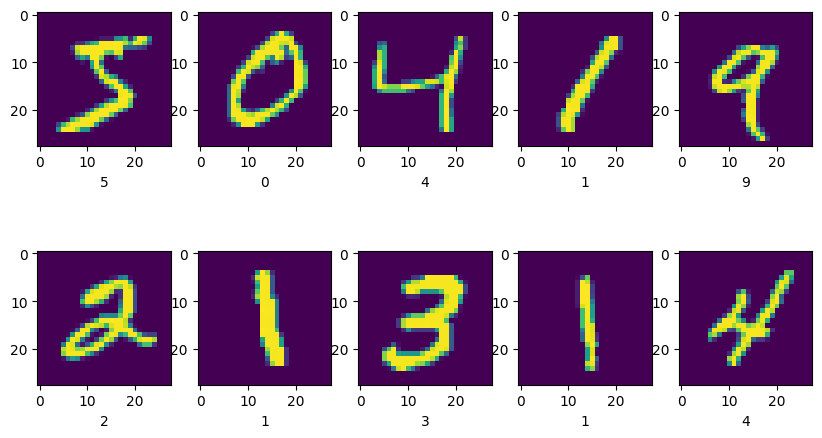

In [109]:
X_train_reshaped = x_train.T.values.reshape(-1, 28, 28)
plt.figure(figsize=(10, 15))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.imshow(X_train_reshaped[i])
    plt.xlabel(y_train.iloc[i])

The remainder on dividing your roll number by 4 will dictate which function you have to complete but ofcourse if you wish to do more and there's no stopping you.\
Roll_number % 6  
                  0:RELU\
                  1:softmax\
                  2:forward_propogation\
                  3:one_hot_encode\
                  4:total_loss\
                  5:backward_propagation

In [110]:
class ANN:
  def __init__(self, input_size, output_size, learning_rate, num_layers, num_of_nodes_layers):
    self.input_size = input_size
    self.output_size = output_size
    self.learning_rate = learning_rate
    self.num_layers = num_layers
    self.num_of_nodes_layers = num_of_nodes_layers
    self.weights_biases = {}
    self.activations = {}

  def initial_params(self):
    np.random.seed(20)
    self.weights_biases['W1'] = np.random.rand(self.num_of_nodes_layers, self.input_size) - 0.5
    self.weights_biases['b1'] = np.random.rand(self.num_of_nodes_layers, 1) - 0.5

    for i in range(2, self.num_layers + 1):
      self.weights_biases[f'W{i}'] = np.random.rand(self.num_of_nodes_layers, self.num_of_nodes_layers) - 0.5
      self.weights_biases[f'b{i}'] = np.random.rand(self.num_of_nodes_layers, 1) - 0.5

    self.weights_biases[f'W{self.num_layers + 1}'] = np.random.rand(self.output_size, self.num_of_nodes_layers) - 0.5
    self.weights_biases[f'b{self.num_layers + 1}'] = np.random.rand(self.output_size, 1) - 0.5

  def RELU(self, Z):
    # Implement the RELU activation function
    pass

  def softmax(self, Z):
    # Implement the softmax activation function
    pass

  def forward_propagation(self, X):
    # Implement the forward_propagation function
    pass

  def one_hot_encode(self, y):

    #One hot encoding converts words into vectors for the model to understand. Each word is signified by 1 in a particular row, and the rest are set to 0.

    y = np.array(y)                           #I have first converted y into a np array, making it easier to navigate.
    no_classes = y.max() + 1                  #No of distinct words/labels, which forms the no of columns of the matrix
    one_hot = np.zeros((len(y),no_classes))   #Length of y (total no of words including repetition) forms the no of rows of matrix, as each row is one hot of one particular label/word

    for i in range(len(y)):
        one_hot[i, y[i]] = 1                  #Setting the one particular element corresponding to the word as 1, rest are initialized as 0

    return one_hot

  def total_loss(self, y_pred, Y):
    # Implement the total loss function
    pass

  def backward_prop(self, y_pred, Y):
    #Implement the backward_prop function
    pass

  def update_params(self,gradients):

    for i in range(1, self.num_layers + 2):
     self.weights_biases[f"W{i}"] -= self.learning_rate * gradients[f"dW{i}"]
     self.weights_biases[f"b{i}"] -= self.learning_rate * gradients[f"db{i}"]

  def train(self, X, y, num_iterations):
    y_train_onehot = self.one_hot_encode(y)
    return y_train_onehot

  def predict(self, X):
        b = {}

        A,b = self.forward_propagation(X)
        predictions = np.argmax(A, axis=0)


        return predictions


In [111]:
model = ANN(input_size=784, output_size=10, learning_rate=0.2, num_layers=3, num_of_nodes_layers=64)
model.train(x_train, y_train, num_iterations=4000)

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [112]:
m = model.predict(x_test)
b = m.shape
c = int(b[0])
d = np.array(y_test)
d = d.T
t=0
for i in range(c):
    if(m[i]==d[i]):
        t=t+1
print('Accuracy:',t/c *100, '%')



TypeError: cannot unpack non-iterable NoneType object

In [113]:
X_test_reshaped = x_test.T.values.reshape(-1, 28, 28)
plt.figure(figsize=(5, 5))
i = 500
print(d[i])
plt.imshow(X_test_reshaped[i])
plt.xlabel(m[i]);


NameError: name 'd' is not defined

<Figure size 500x500 with 0 Axes>